In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Canadian Data Analyst Roles

In [7]:
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='Canada')]

## Job Location

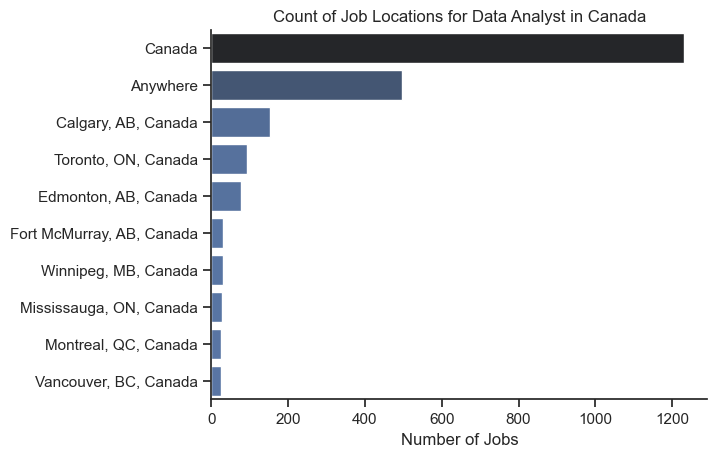

In [19]:
df_plot = df_DA_CA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Count of Job Locations for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

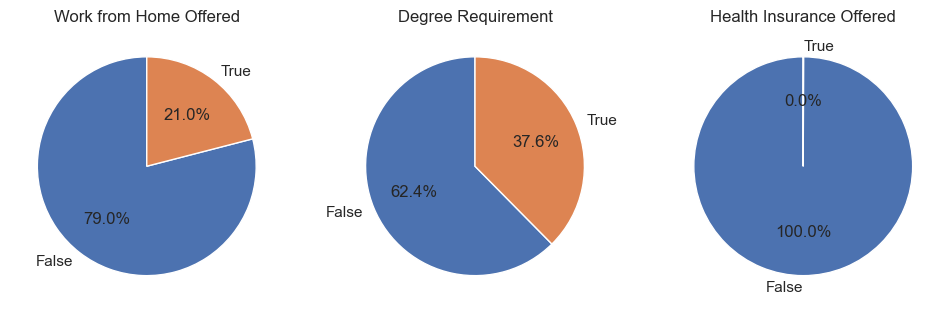

In [21]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

for i,(column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_CA[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
plt.show()

## Companies to Explore

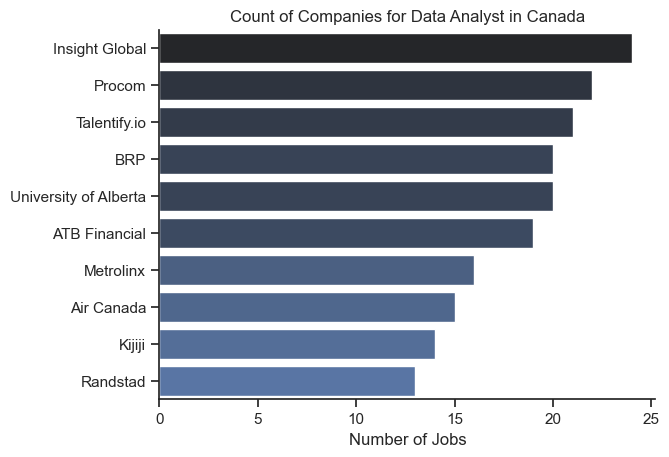

In [27]:
df_plot = df_DA_CA['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue = 'count', palette = 'dark:b_r', legend = False)
sns.despine()
plt.title('Count of Companies for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()